In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [15]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [18]:
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [19]:
correlation_matrix=numerical_df.corr()

In [20]:
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


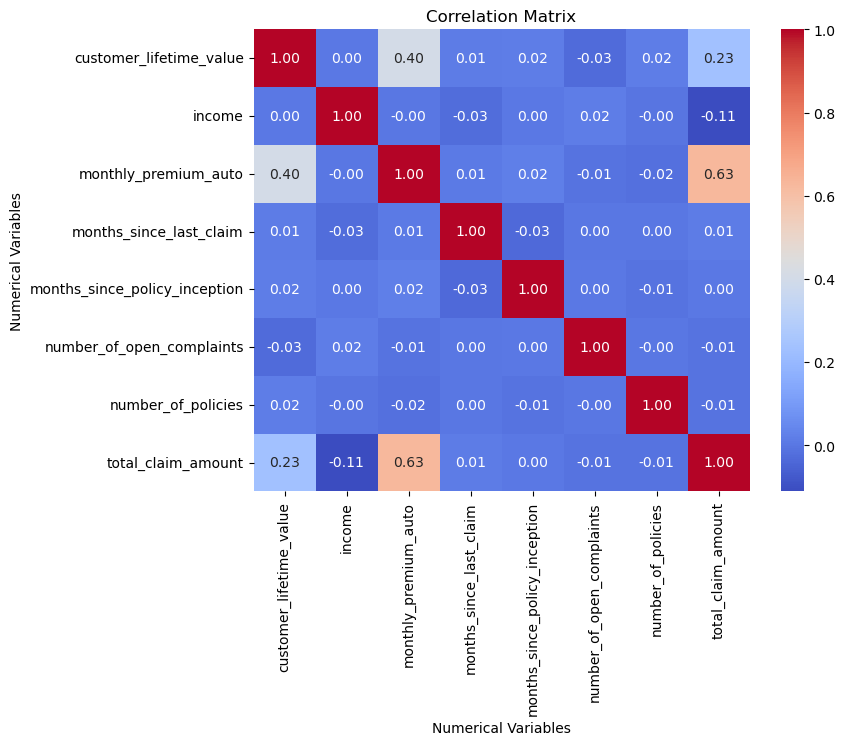

In [21]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Set plot title and labels
plt.title('Correlation Matrix')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
# Display the plot
plt.show()

# variables ain't highly correlated hence not dropping any columns.

## creating dummies-One hot coding- changing nominals to numerical

In [22]:
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [26]:
categorical_df['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [57]:
dummy_ordinals=['region','gender','response','effective_to_date','employment_status','marital_status','policy_type',]
final_data=pd.get_dummies(categorical_df,columns=dummy_ordinals)

In [58]:
final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,policy_type_0,policy_type_1,policy_type_2
0,0,1,feb,1,2,2,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
1,0,1,jan,1,5,3,2,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,feb,1,5,2,2,4,1,0,...,1,0,0,0,0,0,1,0,1,0
3,1,1,jan,1,2,1,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,2,0,jan,1,4,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,jan,1,3,2,3,1,1,1,...,0,0,0,1,0,1,0,0,1,0
10685,0,1,jan,2,5,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10686,1,0,feb,0,2,0,3,2,1,1,...,1,0,0,0,0,1,0,1,0,0
10687,2,1,feb,2,3,0,1,4,1,0,...,1,0,0,0,1,0,0,0,1,0


# changing ordinals to numerical

In [59]:
from sklearn.preprocessing import LabelEncoder
label_ordinals = ['coverage',  'education','location_code','policy','month','renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size']

In [60]:
label_encoder = LabelEncoder()

In [61]:
for column in label_ordinals:
    final_data[column] = label_encoder.fit_transform(final_data[column])

In [62]:
final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,policy_type_0,policy_type_1,policy_type_2
0,0,1,0,1,2,2,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
1,0,1,1,1,5,3,2,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,0,1,5,2,2,4,1,0,...,1,0,0,0,0,0,1,0,1,0
3,1,1,1,1,2,1,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,2,0,1,1,4,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,3,2,3,1,1,1,...,0,0,0,1,0,1,0,0,1,0
10685,0,1,1,2,5,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10686,1,0,0,0,2,0,3,2,1,1,...,1,0,0,0,0,1,0,1,0,0
10687,2,1,0,2,3,0,1,4,1,0,...,1,0,0,0,1,0,0,0,1,0


# optional task

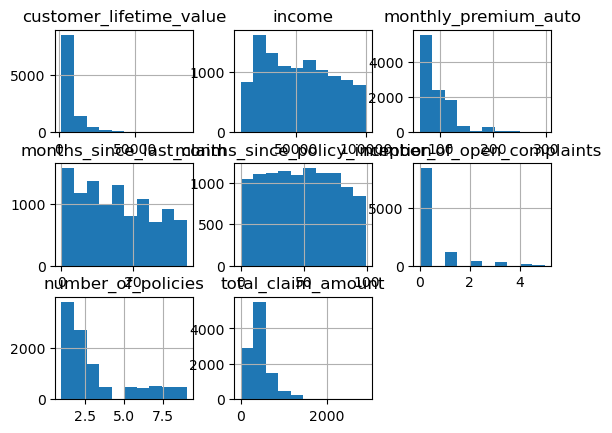

In [64]:
numerical_df.hist()
plt.show()

# varA is income- wide range
# varB is customer_lifetime_value- large skew

In [65]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [66]:
scaler=MinMaxScaler()

In [67]:
columnto_transform='income'

In [70]:
numerical_df[columnto_transform] = scaler.fit_transform(numerical_df[[columnto_transform]])

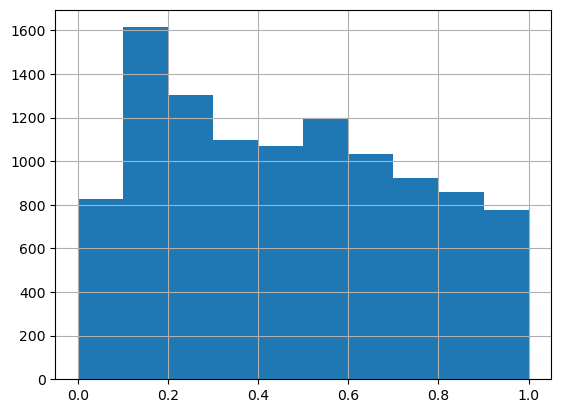

In [72]:
numerical_df['income'].hist()
plt.show()

In [86]:
transformer = PowerTransformer()

In [87]:
numerical_df['customer_lifetime_value'] = transformer.fit_transform(numerical_df[['customer_lifetime_value']])

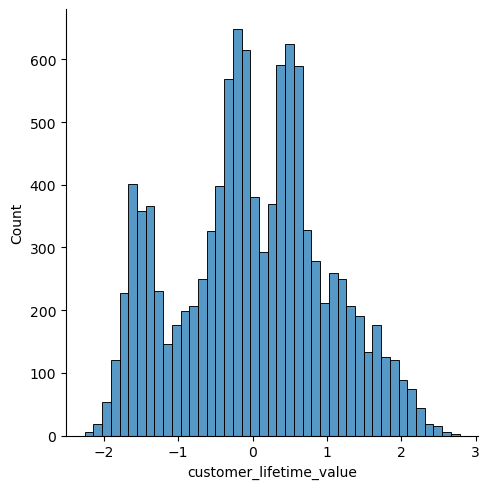

In [89]:
sns.displot(numerical_df.customer_lifetime_value)